In [1]:
import pandas as pd

data = pd.read_csv("kommune_clean.csv")
data.head()

data = data.drop("Unnamed: 0",axis=1) #remove this column that was added when I saved the file

In [2]:
data.shape

(3359, 96)

In [3]:
data.head()

,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,6.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,5.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0


In [36]:
# Features where 1-7 have numerical meaning, and value 8 means "i dont know", hence doesnt have numerical meaning.
numerical_8 = ["Q1_natur_kom_1","Q1_natur_kom_2","Q1_natur_kom_3","Q1_kultur_kom_1",
                     "Q1_kultur_kom_2","Q1_kultur_kom_3","Q1_kultur_kom_4","Q1_kultur_kom_5",
                     "Q1_kultur_kom_6","Q1_kultur_kom_7","Q1_arbeid_kom_1","Q1_arbeid_kom_2",
                     "Q1_arbeid_kom_3","Q1_samferdsel_kom_1","Q1_samferdsel_kom_2","Q1_samferdsel_kom_3",
                     "Q1_samferdsel_kom_4","Q1_samferdsel_kom_5", "Q1_samferdsel_kom_6", "Q1_renovasjon_kom_1",
                     "Q1_renovasjon_kom_2","Q2_1","Q3_1","Q3_2","Q3_3", "Q3_4", "Q3_5","Q9_1",
                     "Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_8","Q9_9","Q9_10","Q9_11",
                     "Q11_1","Q13_1","Q14_1","Q19_1","Q19_2","Q66a_1"]

# Features where 1-7 have numerical meaning, and value 9999 means "i dont know", hence doesnt have numerical meaning.
numerical_7_9999 = ['Q5_1', 'Q6_1', 'Q7_1', 'Q10_1'] 

# Features where all have numerical meaning
numerical = ['Q53a', 'Q54a'] 

# Boolean features but with a value 2 meaning "I dont know"
bool_unsure = ['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q18']

# Categorical features that needs to be one-hot encoded
categorical_one_hot_encode = ['Spraak', 'Q57a', 'Q46a', 'Q48a', 'Q52a', 'Q60a', 'Q58a', 'Q62a', 'Q56a', 'Fylke']

# Categorical features, but these hold numerical meaning. Need to remove the "I dont know" values
categorical_remove_unsure = ['Q61a','Q63a','Q67a']

# Boolean features
boolean = ['Q55a_1', 'Q55a_2', 'Q55a_3', 'Q55a_4', 'Q55a_9', 'Q64a_1', 'Q64a_2', 'Q64a_3', 
           'Q64a_4', 'Q64a_5', 'Q64a_6', 'Q64a_7', 'Q64a_8', 'Q64a_9', 'Q65a_1', 'Q65a_2', 
           'Q65a_3', 'Q65a_4', 'Q65a_5', 'Q65a_6', 'Q65ana', 'Q68a']

### One-hot-encoding

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [6]:
for var in categorical_one_hot_encode:
    data = pd.get_dummies(data=data, columns=[var], prefix=var)

In [7]:
data.head(10)

,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,Q1_kultur_kom_7,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,6.0,...,0,0,0,0,0,0,1,0,0,0
2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,5.0,6.0,...,0,0,0,0,0,0,1,0,0,0
5,7.0,7.0,7.0,6.0,6.0,5.0,5.0,5.0,5.0,6.0,...,0,0,0,1,0,0,0,0,0,0
6,7.0,7.0,7.0,6.0,8.0,4.0,4.0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
7,6.0,2.0,6.0,2.0,2.0,6.0,6.0,4.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8,4.0,6.0,5.0,8.0,3.0,3.0,2.0,3.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
9,7.0,7.0,7.0,7.0,7.0,6.0,4.0,7.0,7.0,7.0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
data.shape

(3359, 149)

Feature imputation: 
https://scikit-learn.org/stable/modules/impute.html#impute

## Unvariate feature imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer

### For 1-8 vars where I want to remove the 8 values

#### Using median

In [10]:
#fixing nan values in the entire set
imp = SimpleImputer(missing_values=np.nan, strategy='median')
median_nan = imp.fit_transform(data[numerical_8])

In [11]:
#fixing 9999 values in the entire set
imp = SimpleImputer(missing_values=8, strategy='median')
median_8 = imp.fit_transform(median_nan)

In [12]:
data_unvariate = data.copy()
data_unvariate[numerical_8] = median_8
pd.DataFrame(data_unvariate).head(20)

,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,Q1_kultur_kom_7,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,6.0,...,0,0,0,0,0,0,1,0,0,0
2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,5.0,6.0,...,0,0,0,0,0,0,1,0,0,0
5,7.0,7.0,7.0,6.0,6.0,5.0,5.0,5.0,5.0,6.0,...,0,0,0,1,0,0,0,0,0,0
6,7.0,7.0,7.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
7,6.0,2.0,6.0,2.0,2.0,6.0,6.0,4.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8,4.0,6.0,5.0,6.0,3.0,3.0,2.0,3.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
9,7.0,7.0,7.0,7.0,7.0,6.0,4.0,7.0,7.0,7.0,...,0,0,0,0,0,0,1,0,0,0


#### Evaluate the three different and which one should I use?

In [13]:
#I'll just use median. especially since the data is scewed.
#but how can I evaluate how well it worked so I can compare it to multivariate feature imputation?

In [14]:
data.shape

(3359, 149)

In [15]:
#when using all the years. These features were only in the dataset for 2019
#data = data.drop("Id",axis=1)
#data = data.drop("Q67a",axis=1)
#data = data.drop("Sentralitet",axis=1)
#data = data.drop("Kommunestr",axis=1)
#data = data.drop("Spraak",axis=1)
#data = data.drop("Q9_7",axis=1)

## Multivariate feature imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [16]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [28]:
data[numerical_7_9999] = data[numerical_7_9999].replace(9999.0, np.NaN)
data[numerical_8] = data[numerical_8].replace(8.0, np.NaN)
data[bool_unsure] = data[bool_unsure].replace(3.0, np.NaN)
data['Q61a'] = data['Q61a'].replace(9.0, np.NaN)
data['Q63a'] = data['Q63a'].replace(5.0, np.NaN)
data['Q67a'] = data['Q67a'].replace(9999.0, np.NaN)

In [29]:
imp = IterativeImputer(missing_values=np.nan, max_iter=10, random_state=0)
multivariate_nan = imp.fit_transform(data[numerical_8+numerical_7_9999+bool_unsure+categorical_remove_unsure])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [30]:
data_multivariate = data.copy()
data_multivariate[numerical_8+numerical_7_9999+bool_unsure+categorical_remove_unsure] = multivariate_nan
pd.DataFrame(data_multivariate).head(10)

,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,Q1_kultur_kom_7,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,4.0,3.0,4.0,6.00000,6.000000,6.0,6.0,4.000000,6.0,6.0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,3.0,3.0,6.00000,4.000000,6.0,4.0,5.000000,6.0,6.0,...,0,0,0,0,0,0,1,0,0,0
2,7.0,6.0,6.0,6.00000,6.000000,4.0,5.0,5.999987,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,6.0,3.0,3.00000,2.000000,2.0,2.0,4.000000,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,7.0,6.0,5.00000,5.000000,5.0,1.0,6.000000,5.0,6.0,...,0,0,0,0,0,0,1,0,0,0
5,7.0,7.0,7.0,6.00000,6.000000,5.0,5.0,5.000000,5.0,6.0,...,0,0,0,1,0,0,0,0,0,0
6,7.0,7.0,7.0,6.00000,5.735586,4.0,4.0,4.000000,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
7,6.0,2.0,6.0,2.00000,2.000000,6.0,6.0,4.000000,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8,4.0,6.0,5.0,2.85403,3.000000,3.0,2.0,3.000000,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
9,7.0,7.0,7.0,7.00000,7.000000,6.0,4.0,7.000000,7.0,7.0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
data_multivariate.shape

(3359, 149)

In [32]:
data_multivariate.to_csv("kommune_multivariate.csv")

In [40]:
print(list(data_multivariate))

['Q1_natur_kom_1', 'Q1_natur_kom_2', 'Q1_natur_kom_3', 'Q1_kultur_kom_1', 'Q1_kultur_kom_2', 'Q1_kultur_kom_3', 'Q1_kultur_kom_4', 'Q1_kultur_kom_5', 'Q1_kultur_kom_6', 'Q1_kultur_kom_7', 'Q1_arbeid_kom_1', 'Q1_arbeid_kom_2', 'Q1_arbeid_kom_3', 'Q1_samferdsel_kom_1', 'Q1_samferdsel_kom_2', 'Q1_samferdsel_kom_3', 'Q1_samferdsel_kom_4', 'Q1_samferdsel_kom_5', 'Q1_samferdsel_kom_6', 'Q1_renovasjon_kom_1', 'Q1_renovasjon_kom_2', 'Q2_1', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q5_1', 'Q6_1', 'Q7_1', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8', 'Q9_9', 'Q9_10', 'Q9_11', 'Q10_1', 'Q11_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q16', 'Q18', 'Q19_1', 'Q19_2', 'Q55a_1', 'Q55a_2', 'Q55a_3', 'Q55a_4', 'Q55a_9', 'Q64a_1', 'Q64a_2', 'Q64a_3', 'Q64a_4', 'Q64a_5', 'Q64a_6', 'Q64a_7', 'Q64a_8', 'Q64a_9', 'Q65a_1', 'Q65a_2', 'Q65a_3', 'Q65a_4', 'Q65a_5', 'Q65a_6', 'Q65ana', 'Q66a_1', 'Q68a', 'Alderkat', 'Q61a', 'Kommunestr', 'Q49a', 'Sentralitet', 'Q63a', 'Q67a', 'Q53

In [33]:
data_multivariate = data_multivariate.drop(['Id'],axis=1)

In [34]:
print(data_multivariate.shape)
data_multivariate = data_multivariate.dropna() #just doing this for now, as I cant be bothered to deal with it
print(data_multivariate.shape)

import math
data_multivariate = data_multivariate.iloc[np.random.permutation(len(data_multivariate))]

data_multivariate = data_multivariate[data_multivariate.Q16 != 11.0]
data_multivariate = data_multivariate[data_multivariate.Q16 != 12.0]
data_multivariate = data_multivariate[data_multivariate.Q16 != 13.0]

dev_test = data_multivariate[:100] 
train = data_multivariate[100:]

from sklearn import tree

target = train["Q16"]
train_x = train.drop(['Q16'],axis=1).values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, target)

predictions = clf.predict(dev_test.drop(['Q16'],axis=1).values)
target = list(dev_test['Q16'])

#accuracy = math.fsum(1 for x,y in zip(predictions,target) if x == y) / len(predictions)
#print(accuracy)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(target, predictions))


from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(target, predictions)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

(3359, 148)
(3220, 148)
Accuracy:  0.17
      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0      9     2    14     1     2     0     0     2     1     1
2.0      3     0     2     0     0     2     2     0     0     0
3.0      4     2     5     2     1     1     3     0     3     1
4.0      1     2     0     1     0     0     2     0     0     0
5.0      1     0     1     0     0     1     0     1     0     0
6.0      0     0     0     0     0     0     0     1     0     0
7.0      1     0     2     0     0     0     2     0     2     0
8.0      2     1     3     0     1     1     1     0     0     0
9.0      3     0     0     0     1     0     0     0     0     0
10.0     1     2     2     0     1     0     0     0     0     0


In [35]:
# TODO check what the accuracy is if I look at the top 2 predictions for each. (check if this is even statistically interesting information)

# What other ways can i evaluate my model?

[Text(567.165084581105, 1066.2923076923078, 'Kommunestr <= 2.5\ngini = 0.818\nsamples = 2424\nvalue = [675, 218, 667, 108, 127, 70, 201, 163, 128, 67]'),
 Text(289.88681538516965, 1024.4769230769232, 'Q64a_8 <= 0.5\ngini = 0.819\nsamples = 754\nvalue = [219, 79, 155, 49, 14, 10, 138, 41, 29, 20]'),
 Text(228.67491653723602, 982.6615384615385, 'Q58a_2.0 <= 0.5\ngini = 0.81\nsamples = 703\nvalue = [214, 76, 148, 29, 13, 10, 129, 39, 28, 17]'),
 Text(159.33228387747587, 940.8461538461539, 'Q61a <= 7.5\ngini = 0.82\nsamples = 521\nvalue = [135, 63, 128, 25, 12, 7, 89, 28, 22, 12]'),
 Text(100.62168750900678, 899.0307692307692, 'Q3_3 <= 5.449\ngini = 0.821\nsamples = 390\nvalue = [109, 50, 78, 20, 8, 6, 74, 22, 14, 9]'),
 Text(60.0301426672858, 857.2153846153847, 'Q9_7 <= 6.5\ngini = 0.824\nsamples = 241\nvalue = [61, 39, 36, 9, 5, 6, 57, 15, 7, 6]'),
 Text(29.176324596096265, 815.4000000000001, 'Q9_10 <= 2.5\ngini = 0.815\nsamples = 158\nvalue = [39, 17, 24, 8, 5, 3, 45, 9, 2, 6]'),
 Text(

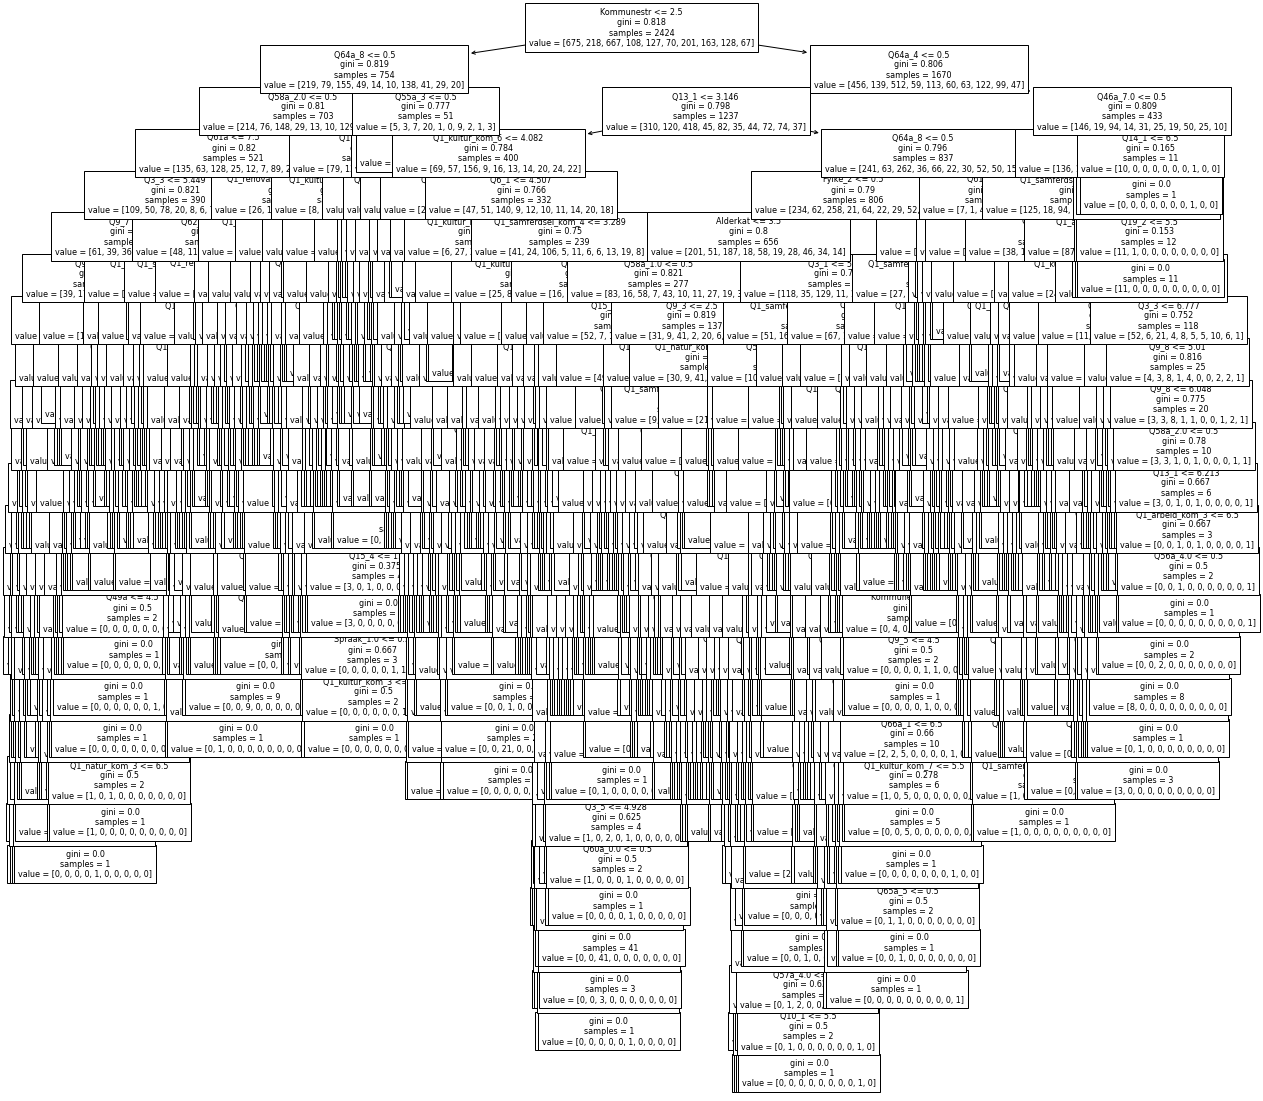

In [26]:
import matplotlib.pyplot as plt
#print(list(train.drop(['Q16'],axis=1)))
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8, feature_names=list(train.drop(['Q16'],axis=1)))

In [39]:
# Feature importance scores
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data_multivariate.drop(['Q16'],axis=1))).sort_values(ascending=False)

for i in range(len(feature_imp)):
    print(str(feature_imp[i]) + "\t" + str(feature_imp.index[i]))

0.02695683541109108	Q1_samferdsel_kom_4
0.024639483509615995	Q9_1
0.024212585629399364	Q1_samferdsel_kom_5
0.02359749229337183	Q9_8
0.023546185435411114	Q61a
0.02296276715111116	Q1_natur_kom_2
0.022463665518216297	Q3_5
0.02091079621863067	Q13_1
0.020472107385728418	Q1_arbeid_kom_3
0.01906811795178345	Kommunestr
0.018940434923139966	Q1_samferdsel_kom_1
0.018080204562406214	Q9_9
0.01785855959368117	Q10_1
0.017610914441963884	Q1_kultur_kom_1
0.01667510856777436	Q11_1
0.01653951445724277	Q3_2
0.015829802564596106	Q3_4
0.015018598960322897	Q9_11
0.01493887737434765	Q9_10
0.014684650255999743	Q9_4
0.014118443485913918	Q9_2
0.014064996295692937	Q9_7
0.013990882532627903	Q3_3
0.013981618731264557	Q14_1
0.013582450697992642	Q1_kultur_kom_4
0.013533130446255644	Q1_kultur_kom_2
0.013320967912450089	Q7_1
0.013214978755117492	Q9_6
0.012849656353677161	Q53a
0.012391627321226333	Q1_samferdsel_kom_3
0.012305111685245153	Alderkat
0.012188552877399847	Q1_kultur_kom_5
0.012171801889588395	Q1_samferdsel_k

No handles with labels found to put in legend.


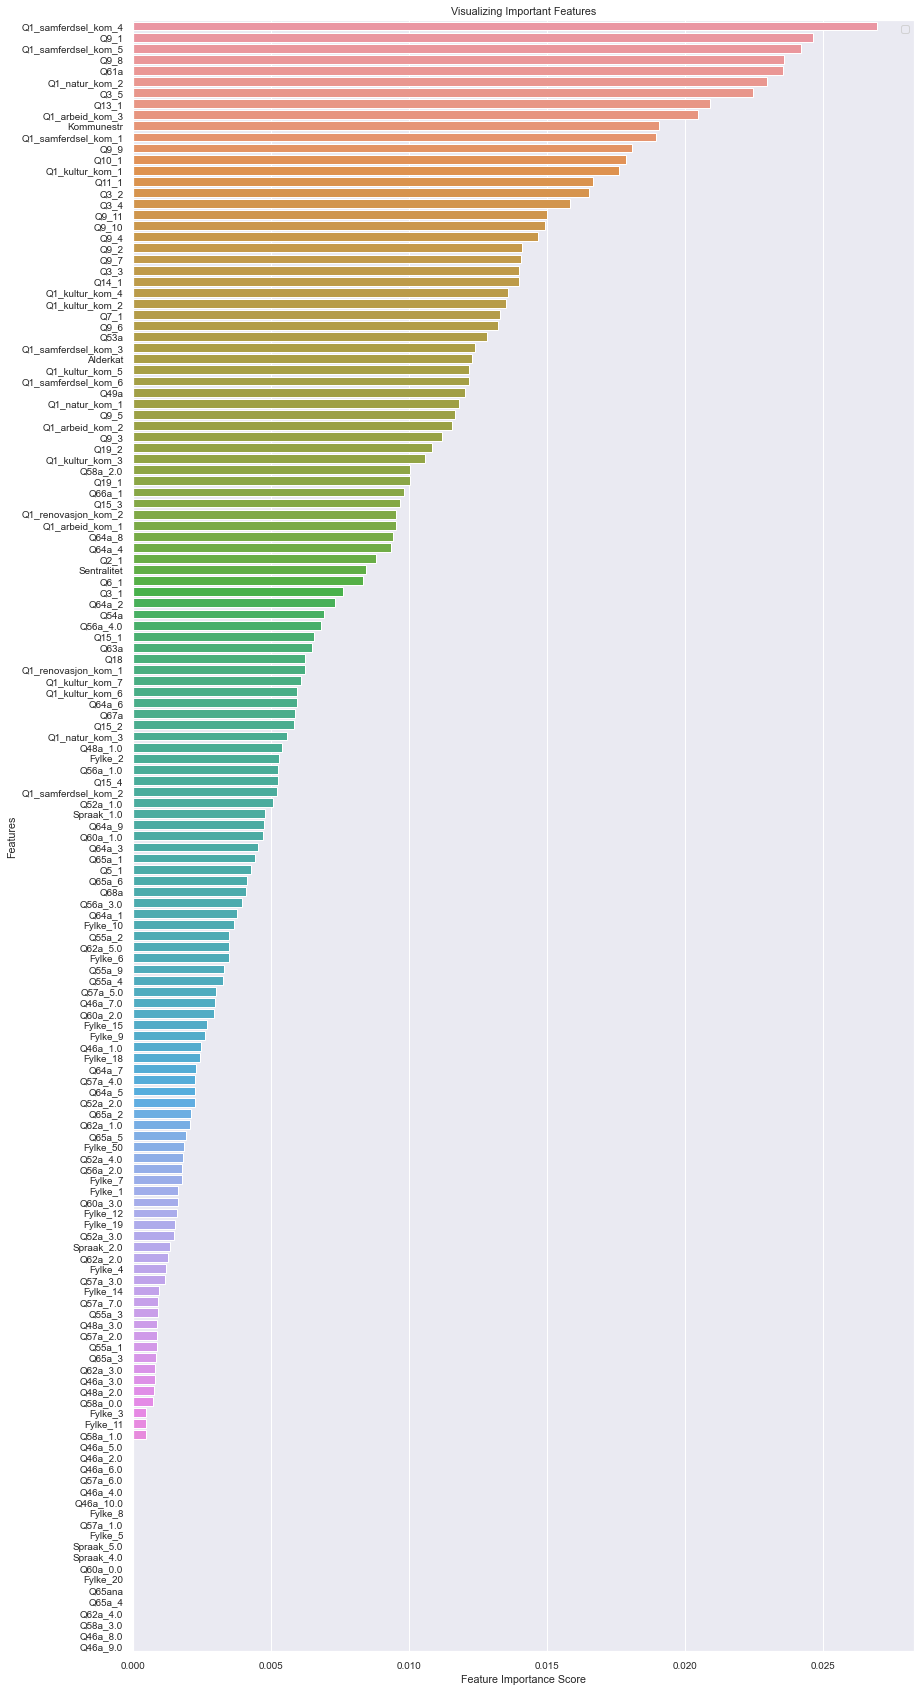

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(14,30)}, font_scale=0.9)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()